In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, PoissonRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as preprocessing 

import regressionUtils as rg


In [2]:
county_df = pd.read_pickle("../Data/county_data_totals.pkl")
county_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3087 entries, 1001.0 to 56045.0
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2019,  (V2019)                                            3087 non-null   float64
 1   Population estimates base, April 1, 2010,  (V2019)                                      3087 non-null   float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)   3087 non-null   float64
 3   Population, Census, April 1, 2010                                                       3087 non-null   float64
 4   Persons under 5 years, percent                                                          3086 non-null   float64
 5   Persons under 18 years, percent                            

In [3]:
county_df.drop(county_df[county_df['deaths'] == 0].index, inplace = True) 
county_df['Deaths per 100k'] = 1e5*county_df['deaths']/county_df['Population estimates, July 1, 2019,  (V2019)']
pt_boxcox = preprocessing.PowerTransformer(method='box-cox', standardize=False)
county_df['Deaths per 100k, trans'] = pt_boxcox.fit_transform(county_df[['Deaths per 100k']])


In [4]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3007 entries, 1001.0 to 56045.0
Data columns (total 67 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2019,  (V2019)                                            3007 non-null   float64
 1   Population estimates base, April 1, 2010,  (V2019)                                      3007 non-null   float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)   3007 non-null   float64
 3   Population, Census, April 1, 2010                                                       3007 non-null   float64
 4   Persons under 5 years, percent                                                          3007 non-null   float64
 5   Persons under 18 years, percent                            

In [5]:
main_features_df = county_df[["Black or African American alone, percent(a)", "Bachelor's degree or higher, percent of persons age 25 years+, 2015-2019", \
                              "Persons  without health insurance, under age 65 years, percent", \
                              "Deaths per 100k, trans"]].dropna()
main_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3004 entries, 1001.0 to 56045.0
Data columns (total 4 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Black or African American alone, percent(a)                               3004 non-null   float64
 1   Bachelor's degree or higher, percent of persons age 25 years+, 2015-2019  3004 non-null   float64
 2   Persons  without health insurance, under age 65 years, percent            3004 non-null   float64
 3   Deaths per 100k, trans                                                    3004 non-null   float64
dtypes: float64(4)
memory usage: 117.3 KB


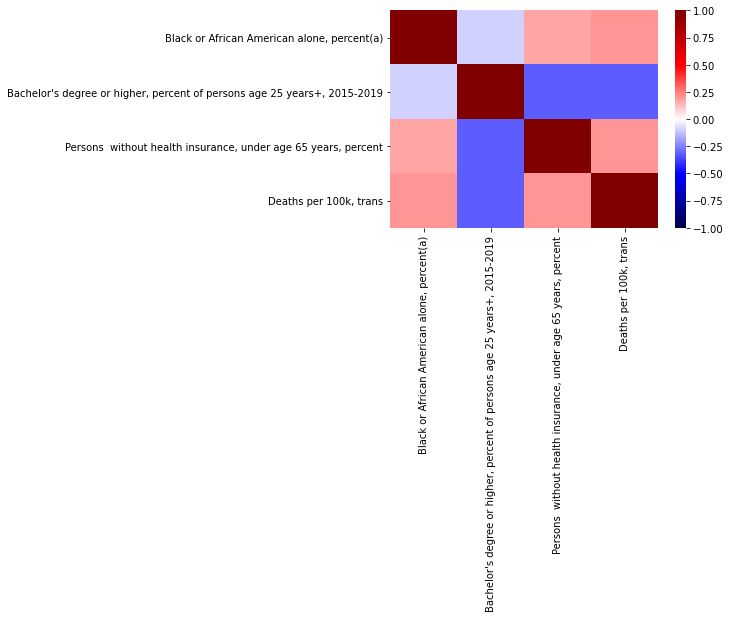

In [6]:
sns.heatmap(main_features_df.corr(), cmap="seismic", vmin=-1, vmax=1);

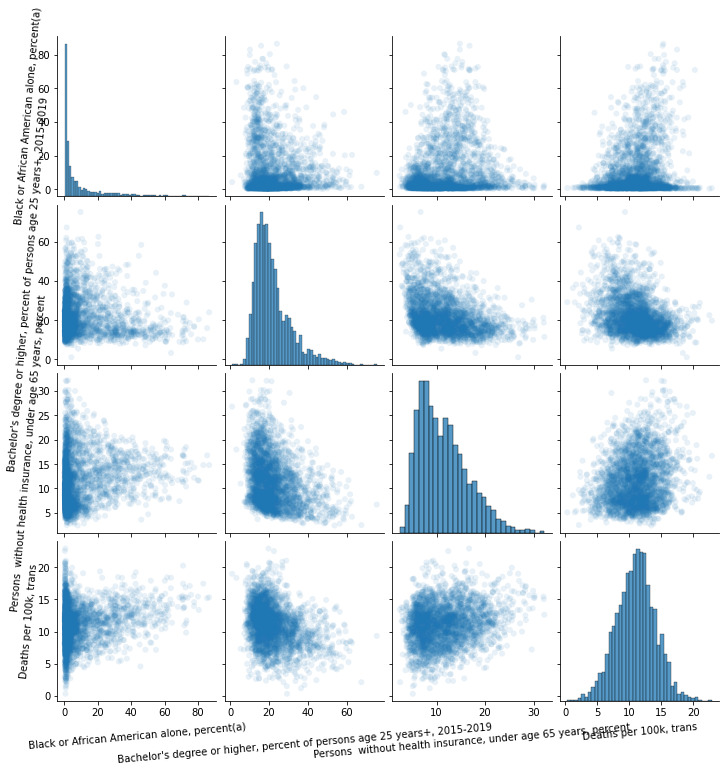

In [7]:
pp = sns.pairplot(main_features_df, plot_kws=dict(alpha=.1, edgecolor='none'))
for ax in pp.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 5)
    ax.set_ylabel(ax.get_ylabel(), rotation = 85)
#     ax.yaxis.get_label().set_horizontalalignment('right')    

In [8]:
X, y = main_features_df.drop('Deaths per 100k, trans',axis=1), main_features_df['Deaths per 100k, trans']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=110) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

Simple regression scores:  [0.18, 0.117, 0.125, 0.108, 0.15] 

Simple mean cv r^2: 0.136 +- 0.026


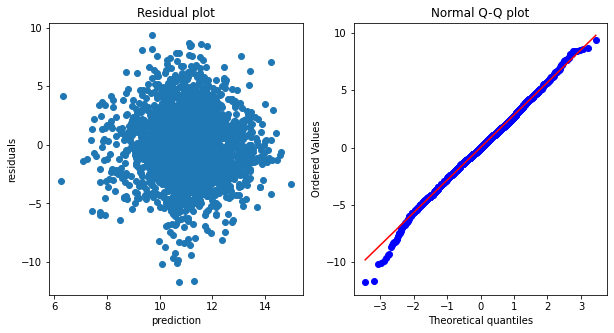

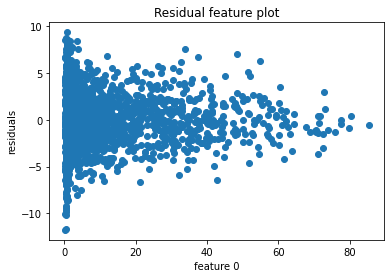

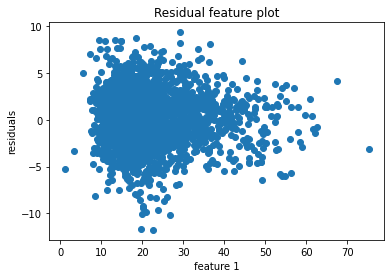

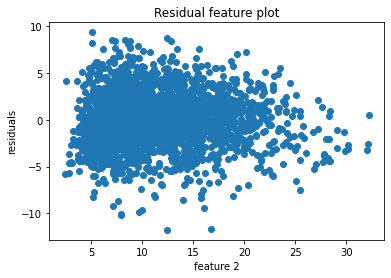

In [9]:
rg.doSimpleLinearRegression(X,y)

Poly scores:  [0.14, 0.148, 0.215, 0.126, 0.124] 

Poly mean cv r^2: 0.151 +- 0.033


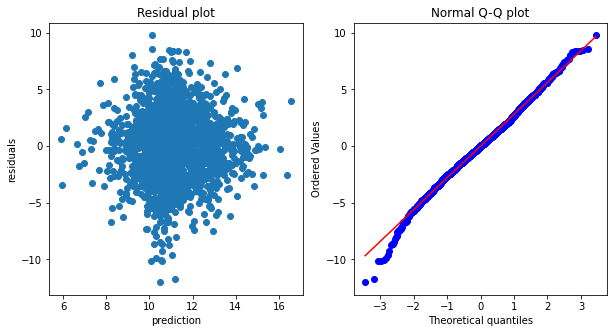

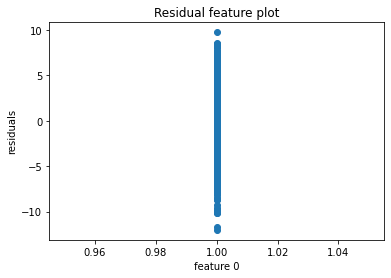

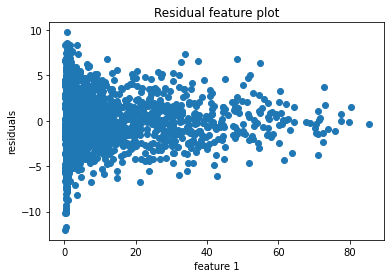

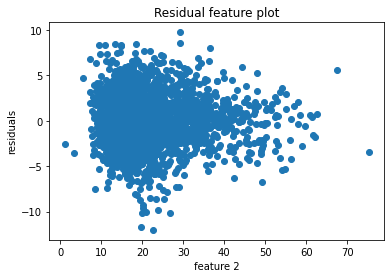

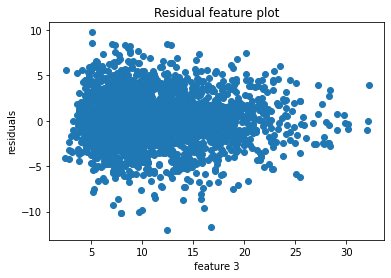

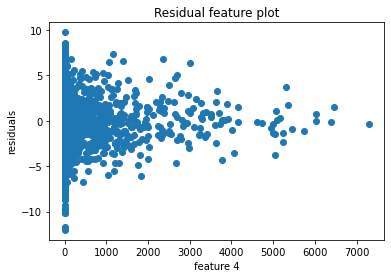

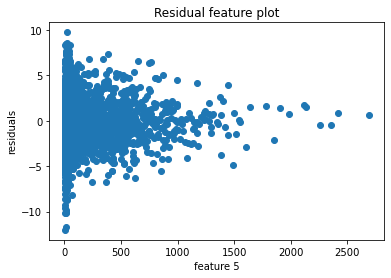

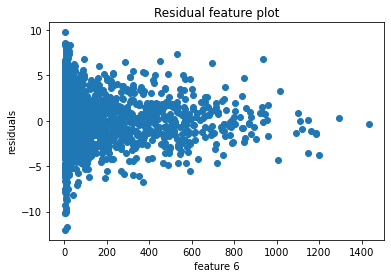

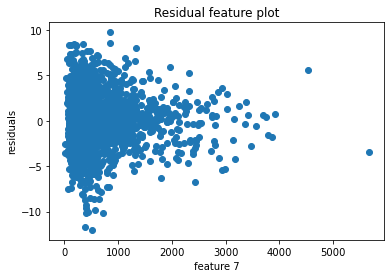

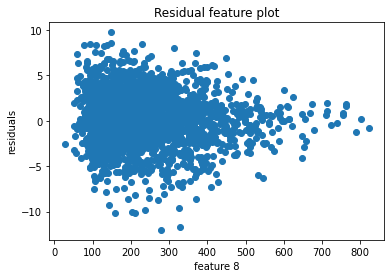

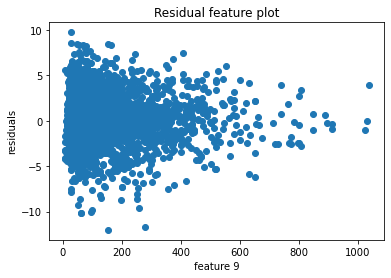

In [10]:
rg.doPolynomialRegression(X,y,2)

In [11]:
#rg.doLassoRegression(X,y,10)